In [21]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
# SQL Server connection setup
server = 'LAPTOP-DI9HFMRT'
database = 'UtilityBilling'

In [23]:
# Connection string
conn_str = (
    'Driver={SQL Server};'
    f'Server={server};'
    f'Database={database};'
    'Trusted_Connection=yes;'
)

In [24]:
# Connect to SQL Server
conn = pyodbc.connect(conn_str)

In [25]:
# Load bill data
query = "SELECT month, bill_amount FROM bills WHERE user_id = 1 ORDER BY month"
df = pd.read_sql(query, conn)
df['month_num'] = range(len(df))
conn.close()

C:\Users\Vishwanath\AppData\Local\Temp\ipykernel_25196\1969606049.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
ignore the abov

In [26]:
# Show the data
df

,month,bill_amount,month_num
0,2021-01,1120.0,0
1,2021-02,1160.0,1
2,2021-03,1190.0,2
3,2021-04,1260.0,3
4,2021-05,1230.0,4
5,2021-06,1290.0,5
6,2021-07,1330.0,6
7,2021-08,1400.0,7
8,2021-09,1380.0,8
9,2021-10,1440.0,9


In [27]:
df.head()

,month,bill_amount,month_num
0,2021-01,1120.0,0
1,2021-02,1160.0,1
2,2021-03,1190.0,2
3,2021-04,1260.0,3
4,2021-05,1230.0,4


In [28]:
df.isnull().sum()

month          0
bill_amount    0
month_num      0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        30 non-null     object 
 1   bill_amount  30 non-null     float64
 2   month_num    30 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [30]:
# Prepare data
X = df[['month_num']]
y = df['bill_amount']


In [38]:
# Polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [39]:
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [43]:
import pandas as pd

# Predict next month
next_input = pd.DataFrame({"month_num": [len(df)]})
predicted = model.predict(poly.transform(next_input))[0]


In [44]:

latest_actual = df.iloc[-1]['bill_amount']


In [45]:
# Metrics
y_pred = model.predict(X_poly)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [46]:
# Output
print(f"Predicted next bill: ₹{int(predicted)}")
print(f"Last actual bill: ₹{int(latest_actual)}")
print(f"MAE: ₹{mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Predicted next bill: ₹1944
Last actual bill: ₹1920
MAE: ₹54.29
MSE: 4776.59
R² Score: 0.90


In [47]:
# Anomaly Detection
if latest_actual > predicted * 1.3:
    print("Abnormal spike detected!")
else:
    print("Bill is normal.")

Bill is normal.


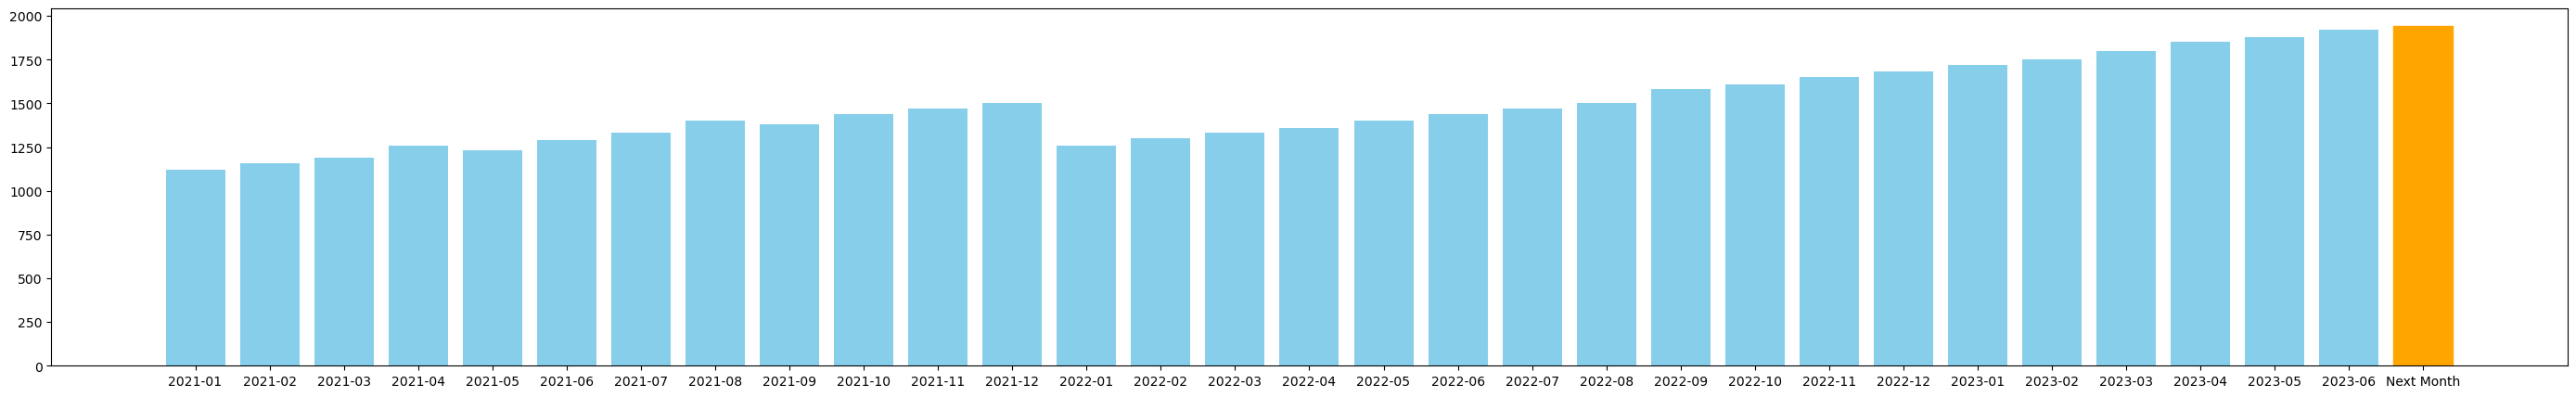

In [49]:
# Plot
df_plot = df.copy()
df_plot.loc[len(df_plot)] = ['Next Month', predicted, len(df)]
plt.figure(figsize=(35, 5))
bars = plt.bar(df_plot['month'], df_plot['bill_amount'], color='skyblue')
bars[-1].set_color('orange')


In this project, we created a small system to predict the next month’s electricity bill using past bill data stored in a SQL database. We used Python to read the data, apply a machine learning model (polynomial regression), and then predict what the next bill could be.

We also checked the accuracy of the prediction using some common formulas (like MAE and R² Score), and the results showed that the prediction was quite good. If the next bill is much higher than expected, our code can detect that and give a warning.

In the end, we showed the results in a graph and saved everything in a CSV file for future use. This system is helpful for people who want to monitor and manage their electricity bills easily.